## EXERCISE: Decision trees



### Let's try a decision tree on Iris data.



In [20]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
key=', '.join(['{}={}'.format(i,name) for i,name in enumerate(iris.target_names)])

# First let's create a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.33,
                                                    random_state=5) # so we get the same results

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# Let's fit a model
tree = DecisionTreeClassifier(max_depth=2)
_ = tree.fit(X_train, Y_train)

# Evaluate
print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, tree.predict(X_test)))

Classification report (0=setosa, 1=versicolor, 2=virginica):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.94      0.91        17
           2       0.94      0.88      0.91        17

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



## EXERCISE: Model selection on test data





### McNemar's test

McNemar's test is [recommended when we have a single test split](http://sci2s.ugr.es/keel/pdf/algorithm/articulo/dietterich1998.pdf).

Under H0, the two algorithms should have the same error rate.

In [22]:
from scipy.stats import chi2

def mcnemar(x, y):
    n1 = np.sum(x < y)
    n2 = np.sum(x > y)
    stat = (np.abs(n1-n2)-1)**2 / (n1+n2)
    df = 1
    pval = chi2.sf(stat,1)
    return stat, pval

### TODO Compare classifiers

- Choose the decision tree max_depth in [2..6], criterion in ['entropy', 'gini'] and splitter in ['best', 'random']. What are the best parameters? Print out all grid scores to sanity check the selection. Is there a unique best set of parameters?
- Use `np.array` create `l_yn` and `t_yn` arrays showing respectively for logistic regression and decision tree whether each test instance is predicted correctly (`1`) or incorrectly (`0`). Are the classifiers significantly different at p<=0.05 according to McNemar's test?(use the logistic regression code from previous week)
- Which classifier is significantly better at p<=0.05 using paired t-test?(use f-score measure)

In [23]:
# TODO: replace the content of this cell with your solution
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


param_grid = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
logreg = GridSearchCV(LogisticRegression(), param_grid)
logreg.fit(X_train, Y_train)
print("Best parameters set found on development set:")
print(logreg.best_params_)

param_grid = [{'max_depth': [2,3,4,5,6],
              'criterion': ['entropy', 'gini'],
              'splitter': ['best', 'random']}]
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, Y_train)
print("Best parameters set found on development set:")
print(tree.best_params_)
print('Classification report({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters set found on development set:
{'C': 10}
Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 6, 'splitter': 'random'}
Classification report(0=setosa, 1=versicolor, 2=virginica):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        17
           2       0.94      0.94      0.94        17

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [24]:
# TODO: replace the content of this cell with your solution
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

param_grid = [{'max_depth': [2,3,4,5,6],
              'criterion': ['entropy', 'gini'],
              'splitter': ['best', 'random']}]
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, Y_train)
logit = LogisticRegression()
logit.fit(X_train, Y_train)
print(Y_test)
print(logit.predict(X_test))
print(tree.predict(X_test))

l_yn = np.array([int(p==t) for p,t in zip(logit.predict(X_test),Y_test)])
t_yn = np.array([int(p==t) for p,t in zip(tree.predict(X_test),Y_test)])
print(l_yn)
print(t_yn)

pvalue = mcnemar(l_yn, t_yn)[1]
print('p-value = {}'.format(pvalue))

if pvalue < 0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

[1 2 2 0 2 1 0 1 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2 0 1 1 0 1 0 0
 2 0 2 2 1 0 0 1 2 1 2 2 0]
[1 2 2 0 2 1 0 2 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2 0 1 1 0 1 0 0
 2 0 2 2 1 0 0 1 2 1 2 2 0]
[1 1 2 0 2 1 0 2 0 1 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2 0 1 1 0 1 0 0
 2 0 2 2 1 0 0 1 2 1 2 2 0]
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
p-value = 0.47950012218695337
Fail to reject H0


## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

# From data to decisions


## EXERCISE: Ensembling classifiers

### Load and split data

scikit-learn provides a `train_test_split` function (in `sklearn.cross_validation`). However, there is no function to do a three-way split into training, development and held-out test data.

Let's create a three-way 50/25/25 train/dev/test split by using `train_test_split` two times.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

# load digits data
digits = load_digits()
X, y = digits.data, digits.target
X_td, X_test, y_td, y_test = train_test_split(digits.data, digits.target, test_size=0.25,
                                              random_state=5) # so we get the same results
X_train, X_dev, y_train, y_dev = train_test_split(X_td, y_td, test_size=0.33,
                                                  random_state=5) # so we get the same results

### Plot error vs complexity for decision tree

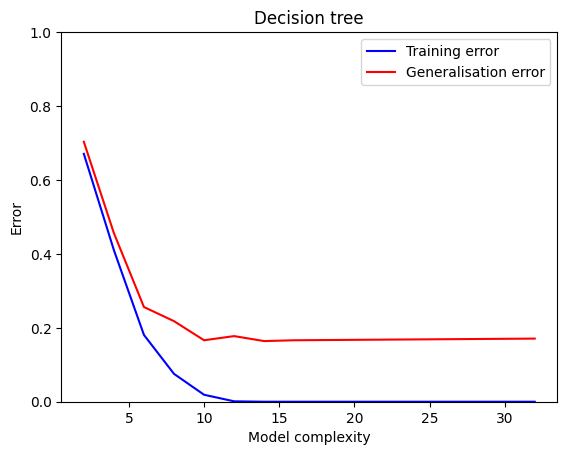

In [26]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


def error(clf, X, y):
    "Calculate error as 1-accuracy"
    return 1-clf.score(X,y)



complexities = []
train_errors = []
val_errors = []
for max_depth in [2,4,6,8,10,12,14,16,32]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_errors.append(error(clf,X_train,y_train))
    val_errors.append(error(clf,X_dev,y_dev))
    complexities.append(max_depth)

plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, val_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Decision tree')
plt.legend()
plt.show()

### TODO Assessing decision tree fit

- Does training or generalisation error level out first? Why?
- What is the best value of max_depth based on this plot?
- Why doesn't generalisation error increase on the right

In [27]:
# TODO: replace the content of this cell with your solution
"""
1. Does training or generalization error level out first? Why?
Answer: Usually, the training error levels out first. This is because as the model's complexity increases with higher max_depth, it becomes better at memorizing the training data. However, this doesn't guarantee improved generalization to new, unseen data. When max_depth gets too high, the model may overfit the training data, driving the training error close to zero while the generalization error stops decreasing or even begins to rise due to overfitting.

2. What is the best value of max_depth based on this plot?
Answer: The best value of max_depth is where the generalization error (or validation error) reaches its minimum before it starts to plateau or increase. You would look for the point on the plot where the validation error (red curve) is at its lowest. For example, if the validation error is lowest at max_depth = 6, that would be the optimal depth, since increasing complexity beyond this point doesn't significantly improve generalization and may even worsen it due to overfitting.

3. Why doesn't generalization error increase on the right?
Answer: In some cases, the generalization error may not rise as max_depth increases because the model has reached a point where it can't extract any more useful information from the training data. As a result, the validation error stabilizes, indicating the model has captured most of the meaningful patterns. Further increases in model complexity don’t lead to better test data performance. However, if the data contains noise, additional complexity could eventually lead to overfitting, which would cause the generalization error to increase.
"""


### Plot error vs complexity for random forest

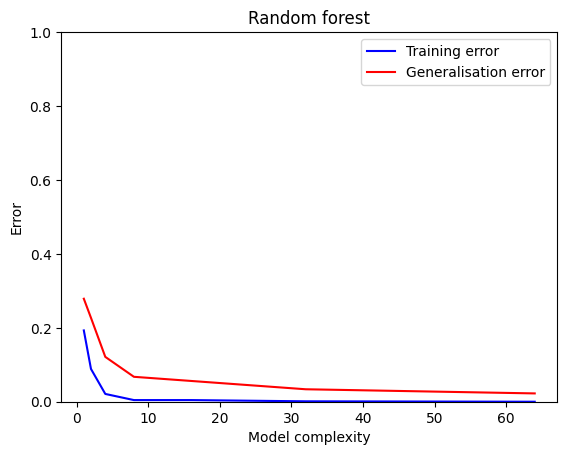

In [28]:
from sklearn.ensemble import RandomForestClassifier

complexities = []
train_errors = []
val_errors = []
for n_estimators in [1,2,4,8,16,32,64]:
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=8)
    clf.fit(X_train, y_train)
    train_errors.append(error(clf,X_train,y_train))
    val_errors.append(error(clf,X_dev,y_dev))
    complexities.append(n_estimators)


plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, val_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Random forest')
plt.legend()
plt.show()